# Logistic Regression for Classification

## PART A : Prerequisites for Logistic Regression implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns = ['X1', 'X2', 'Y']
data = pd.read_csv('data/training_data.csv', names=columns)
data.head()

,X1,X2,Y
0,4.5192,2.6487,1.0
1,2.4443,1.5438,1.0
2,4.2409,1.8990,1.0
3,5.8097,2.4711,1.0
4,6.4423,3.3590,1.0


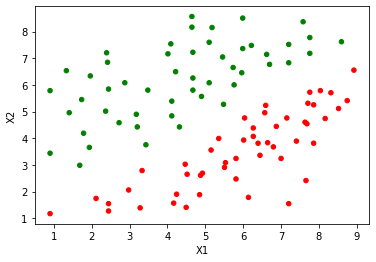

In [3]:
col = data.Y.map({0:'g', 1:'r'}) 
data.plot.scatter(x='X1', y='X2', c=col)
plt.show()

In [4]:
X = np.random.randint(0, 100, 100)
Y = 2*X + 3

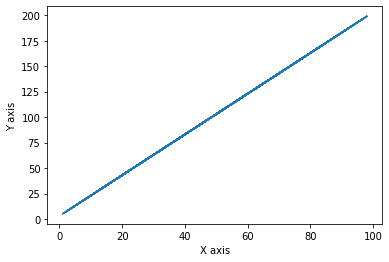

In [5]:
plt.plot(X, Y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [6]:
import math

def sigmoid(gamma):
    if gamma < 0:
        return 1 - 1 / (1 + math.exp(gamma))
    return 1 / (1 + math.exp(-gamma))

In [7]:
V = np.random.randint(-1000, 1000, 10)
v = np.empty(10, dtype=float)

for i in range(0, len(V)):
    v[i] = sigmoid(V[i])

print(f'The range of V is {V}')
print(f'The range of v is {v}')

The range of V is [-712 -655   15 -652 -147 -650  463  736  558  851]
The range of v is [0.         0.         0.99999969 0.         0.         0.
 1.         1.         1.         1.        ]


In [8]:
def hypothesis(theta, X):
    if (sigmoid(theta*X) > 0.5):
        return 0
    else:
        return 1

In [9]:
def cost(theta, X, y):
    result = 0
    for i in range(0, len(X)):
        result+= y[i]*np.log(hypothesis(theta, X[i])) - (1-y[i])*np.log(1-(hypothesis(theta, X[i])))
    result

## Part B: Implementation of Logistic Regression

In [10]:
# def logistic_regression:
    

In [67]:
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("data/loan_data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
gender_map = {"Male" : 0, "Female" : 1, "NaN" : -1}
married_map = {"No" : 0, "Yes" : 1}
education_map = {"Graduate": 1, "Not Graduate" : 0}
employment_map = {"No" : 0, "Yes" : 1, "NaN" : -1}
property_area_map = {"Urban": 1, "Semiurban" : 2, "Rural" : 0}
loan_status_map = {"Y": 1, "N": 0}

gender_filter = data["Gender"].map(gender_map)
data["Gender"] = gender_filter

data["Married"] = data["Married"].map(married_map)
data["Education"] = data["Education"].map(education_map)
data["Self_Employed"] = data["Self_Employed"].map(employment_map)
data["Property_Area"] = data["Property_Area"].map(property_area_map)
data["Loan_Status"] = data["Loan_Status"].map(loan_status_map)

data = data.drop(['Dependents'], axis=1)
data = data.dropna()

data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1
6,LP001013,0.0,1.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,1
7,LP001014,0.0,1.0,1,0.0,3036,2504.0,158.0,360.0,0.0,2,0
8,LP001018,0.0,1.0,1,0.0,4006,1526.0,168.0,360.0,1.0,1,1
9,LP001020,0.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,2,0
10,LP001024,0.0,1.0,1,0.0,3200,700.0,70.0,360.0,1.0,1,1


In [69]:
X = data.iloc[:, 1:12]
Y = data['Loan_Status']

print(X, Y)

     Gender  Married  Education  Self_Employed  ApplicantIncome  \
1       0.0      1.0          1            0.0             4583   
2       0.0      1.0          1            1.0             3000   
3       0.0      1.0          0            0.0             2583   
4       0.0      0.0          1            0.0             6000   
5       0.0      1.0          1            1.0             5417   
..      ...      ...        ...            ...              ...   
609     1.0      0.0          1            0.0             2900   
610     0.0      1.0          1            0.0             4106   
611     0.0      1.0          1            0.0             8072   
612     0.0      1.0          1            0.0             7583   
613     1.0      0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.

In [79]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000000).fit(X, Y)
y_pred = clf.predict(X)
clf.predict_proba(X)
clf.score(X, Y)

y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [85]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y, y_pred)

array([[154,   0],
       [  0, 336]], dtype=int64)

In [87]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(Y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       154
     class 1       1.00      1.00      1.00       336

    accuracy                           1.00       490
   macro avg       1.00      1.00      1.00       490
weighted avg       1.00      1.00      1.00       490

